# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date
import hvplot.pandas
import requests
import time

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 574
['bilibino', 'puerto natales', 'port-aux-francais', 'ilulissat', 'touros', 'sai kung', 'hawaiian paradise park', 'thompson', 'taiohae', 'kolomyia', 'morant bay', 'melfi', 'invercargill', 'waitangi', 'qaqortoq', 'rongelap', 'adamstown', 'nadym', 'ribeira grande', 'westport', 'ambovombe', 'mount isa', 'sakaiminato', 'keflavik', 'fuyuan', 'trincomalee', 'belmonte', 'dudinka', 'viedma', 'rio grande', 'albany', "st. john's", 'anadyr', 'jhang sadr', 'edinburgh of the seven seas', 'uturoa', 'gambiran satu', 'saint-pierre', 'tuburan', 'caburan', 'kingsville', 'ola', 'bardai', 'puerto ayora', 'cargados carajos', 'cambridge', 'cruzeiro do sul', 'port mathurin', 'east london', 'west island', 'obo', 'grytviken', 'yellowknife', 'vorgashor', 'acapulco de juarez', 'curitibanos', 'ta`u', 'blackmans bay', 'phongsali', 'juneau', 'kataragama', 'klyuchi', 'bargara', 'tete', 'chonchi', 'jamestown', 'afaahiti', 'san vicente', "kamen'-na-obi", 'weno', 'aykhal', 'coahuayana d

In [49]:
cities_df = pd.DataFrame(cities)
cities_df.head()

,0
0,island harbour
1,west island
2,grajau
3,edinburgh of the seven seas
4,la'ie


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [60]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

###pprint(response)
###response_json = response.json()
###city_weather_json = city_weather.json()
###pprint(city_weather)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    ##### city_url = f"{url}appid={weather_api_key}={city}" DOES NOT SEEM TO WORK USING DIRECT API KEY INTERIM
    ###city_url = f"{url}appid=a6e440a51483e090944d3af9db7fec10&units={units}&q={city}"
    city_url = f"{url}&q={city}&units={units}&appid=a6e440a51483e090944d3af9db7fec10"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | sai kung
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | kolomyia
Processing Record 11 of Set 1 | morant bay
Processing Record 12 of Set 1 | melfi
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | rongelap
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | nadym
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | westport
Processing Record 21 of Set 1 | ambovombe
Processing Record 22 of S

In [61]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [62]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-1.60,82,80,0.98,RU,1683829374
1,puerto natales,-51.7236,-72.4875,9.25,76,75,2.06,CL,1683829374
2,port-aux-francais,-49.3500,70.2167,7.51,92,100,18.57,TF,1683829374
3,ilulissat,69.2167,-51.1000,-1.99,80,75,8.75,GL,1683829374
4,touros,-5.1989,-35.4608,28.90,65,33,5.08,BR,1683829374


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,271.55,82,80,0.98,RU,1683828275
1,puerto natales,-51.7236,-72.4875,285.40,58,75,1.54,CL,1683828156
2,port-aux-francais,-49.3500,70.2167,280.66,92,100,18.57,TF,1683828293
3,ilulissat,69.2167,-51.1000,271.16,80,75,8.75,GL,1683828293
4,touros,-5.1989,-35.4608,302.05,65,33,5.08,BR,1683828293


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [75]:
# Variable date for each unique day code is ran
current_date = date.today()

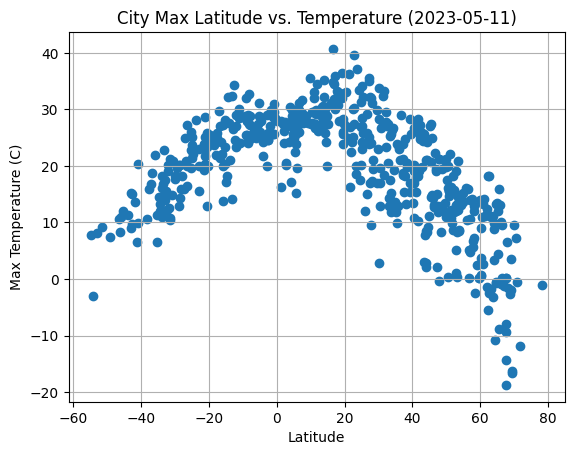

In [76]:
 # Build scatter plot for latitude vs. temperature
x_vals = city_data_df['Lat']
y_vals = city_data_df['Max Temp']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({current_date})')
plt.grid()

# Save the figure
plt.savefig(f"output_data/City Max Latitude vs. Temperature ({current_date}).png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

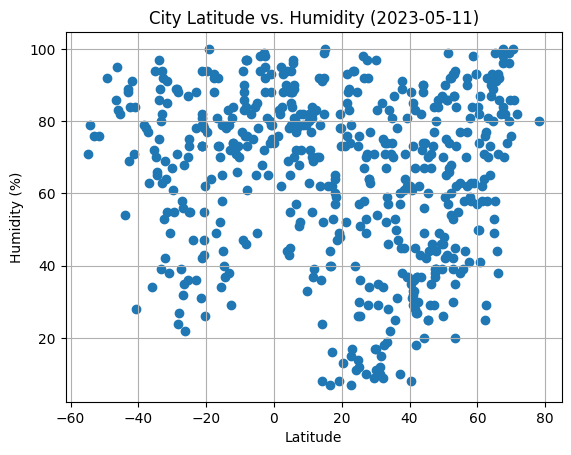

In [77]:
# Build the scatter plots for latitude vs. humidity
x_vals = city_data_df['Lat']
y_vals = city_data_df['Humidity']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({current_date})')
plt.grid()

# Save the figure
plt.savefig(f"output_data/City Latitude vs. Humidity ({current_date}).png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

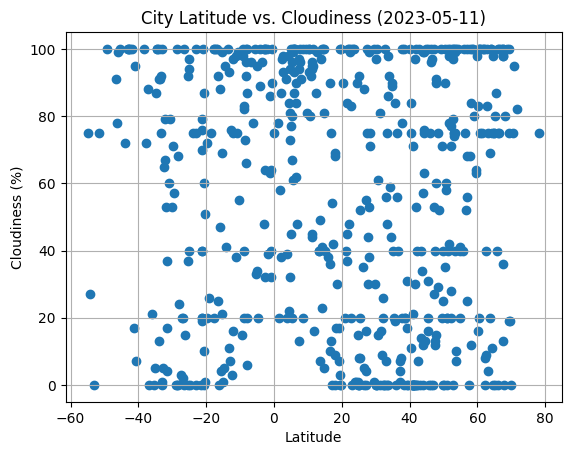

In [78]:
# Build the scatter plots for latitude vs. cloudiness
x_vals = city_data_df['Lat']
y_vals = city_data_df['Cloudiness']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({current_date})')
plt.grid()

# Save the figure
plt.savefig(f"output_data/City Latitude vs. Cloudiness ({current_date}).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

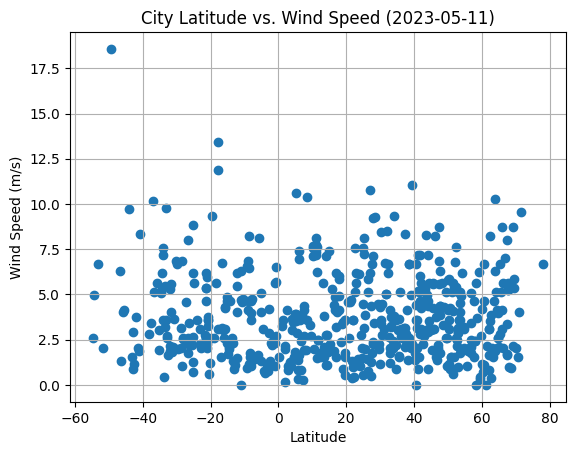

In [79]:
# Build the scatter plots for latitude vs. wind speed
x_vals = city_data_df['Lat']
y_vals = city_data_df['Wind Speed']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({current_date})')
plt.grid()

# Save the figure
plt.savefig(f"output_data/City Latitude vs. Wind Speed ({current_date}).png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def Linear_regression(x,y):
    x_label = ''
    y_label = ''
    title = ''

    #Run linear regression
    ####(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    (slope, intercept) = linregress(x_vals, y_vals)
    regress_vals = x_vals * slope + intercept
    ###line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Plot scatter plot
    plt.scatter(x_vals,y_vals)

    #Plot regresssion line
    plt.plot(x_vals,regress_vals,"r-")

    #Label plot
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    plt.title(f'{title}')

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-1.60,82,80,0.98,RU,1683829374
3,ilulissat,69.2167,-51.1000,-1.99,80,75,8.75,GL,1683829374
5,sai kung,22.3822,114.2728,25.13,74,99,0.45,CN,1683829374
6,hawaiian paradise park,19.5933,-154.9731,25.57,82,0,1.54,US,1683829375
7,thompson,55.7435,-97.8558,16.09,39,40,1.03,CA,1683829375


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,puerto natales,-51.7236,-72.4875,9.25,76,75,2.06,CL,1683829374
2,port-aux-francais,-49.3500,70.2167,7.51,92,100,18.57,TF,1683829374
4,touros,-5.1989,-35.4608,28.90,65,33,5.08,BR,1683829374
11,invercargill,-46.4000,168.3500,8.34,95,78,1.34,NZ,1683829375
12,waitangi,-43.9535,-176.5597,11.24,54,72,9.75,NZ,1683829376


###  Temperature vs. Latitude Linear Regression Plot

In [85]:
# Linear regression on Northern Hemisphere
#BRB

ValueError: too many values to unpack (expected 2)

The r-value is: 0.4121057168607245


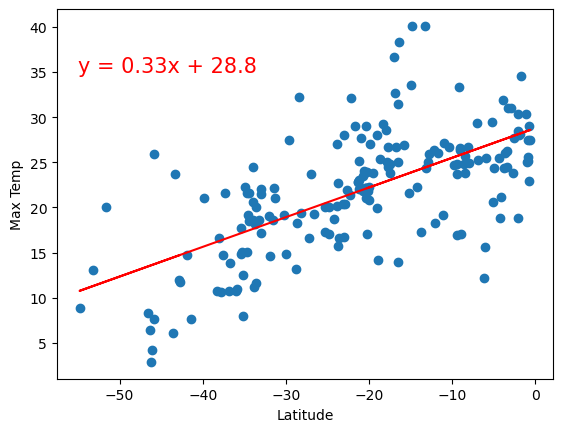

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


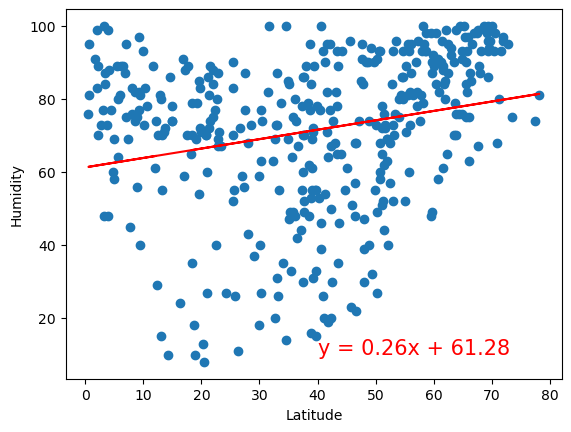

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


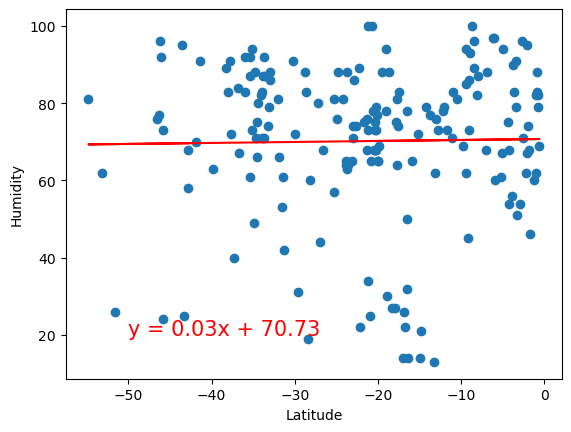

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


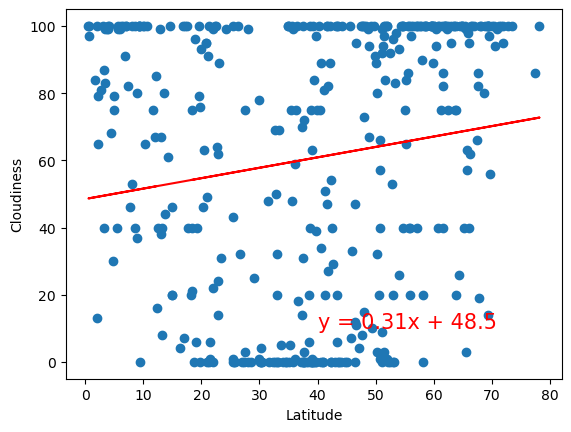

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


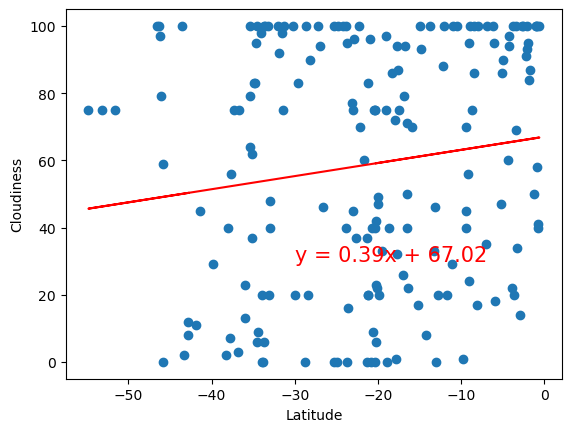

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


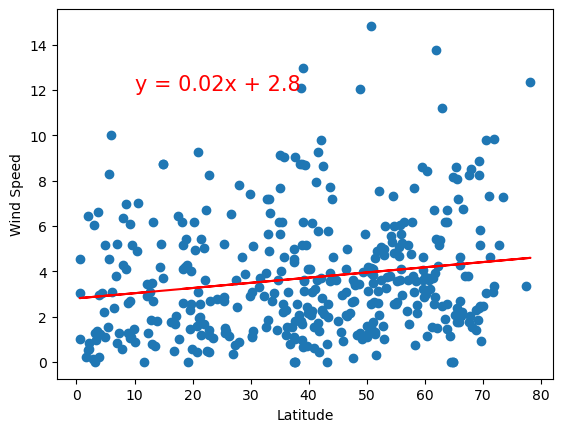

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


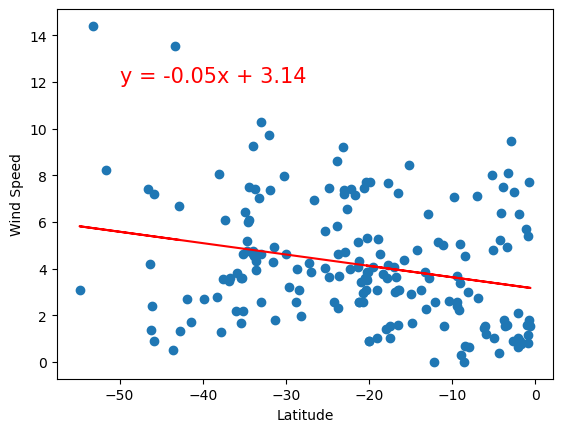

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE